# project 4
---
## Predicting The 2024 Presidential Election outcome with Machine Learning algorithm
---
### Data collection
---

**We will need a set of `Historical Presidential Election Data` composed of.**

- `Elections results` from 'kaggle' 
- `Demographic` data from the 'US Census Bureau'
- `Econimic Indicators` data from the 'Federal Reserve Economic Data(FRED)'
- `Social Media and Sentiment Analysis` data from 'Google Trends'.
---
**The data will covert a period of 15 years, covering the last 5 presidential elections and leading up to the next election.**


#### 1-Importing elections_data file 

In [363]:
# Importing dependencies
from pathlib import Path
import pandas as pd

# Defining the path to the csv file
file_path = Path('Resources/elections_data.csv')

# Reading the csv file into a pandas dataframe
elections_data = pd.read_csv(file_path)

# Displaying the dataframe
elections_data.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
# Summary of the dataset
elections_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7526 entries, 0 to 7525
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  7526 non-null   int64  
 1   county_fips           7526 non-null   int64  
 2   inctot                7526 non-null   float64
 3   mortamt1              7526 non-null   float64
 4   avrg_age              7526 non-null   float64
 5   ftotinc               7526 non-null   float64
 6   foodstmp_1_freq       7526 non-null   float64
 7   foodstmp_2_freq       7526 non-null   float64
 8   sex_2_freq            7526 non-null   float64
 9   sex_1_freq            7526 non-null   float64
 10  marst_5_freq          7526 non-null   float64
 11  marst_6_freq          7526 non-null   float64
 12  marst_1_freq          7526 non-null   float64
 13  marst_4_freq          7526 non-null   float64
 14  marst_3_freq          7526 non-null   float64
 15  marst_2_freq         

In [367]:
# import re
import re

# extracting the state fips codes from the county fips code with regex
elections_data['county_fips'] = elections_data['county_fips'].astype(str)
elections_data['code'] = elections_data['county_fips'].str.extract(r'(\d{1,2})')[0]
elections_data.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner,code
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [369]:
# Convert 'code' column to numeric values
elections_data['code'] = pd.to_numeric(elections_data['code'], errors='coerce')

# Filter the dataset based on the specified conditions
elections_data = elections_data.loc[(elections_data['year'] >= 2008) & 
                                    (elections_data['year'] <= 2020) & 
                                    (elections_data['code'] < 56)]

In [234]:
# Mapping the 'county_fips'column values to their corresponding codes
state_dict = {
            1:'AL' , 2:'AK', 4:'AZ',5:'AR', 6:'CA' , 8:'CO' , 9:'CT' , 10:'DE', 11:'DC', 12:'FL',13:'GA',
            15:'HI', 16: 'ID',17: 'IL',18: 'IN',19: 'IA',20:'KS' , 21:'KY' , 22:'LA', 23:'ME' , 24:'MD' ,
            25:'MA' , 26:'MI' , 27:'MN' , 28:'MS', 29:'MO',30:'MT' , 31:'NE',32:'NV',33:'NH',34: 'NJ',35:'NM',
            36:'NY' , 37:'NC' ,38:'ND' , 39:'OH' , 40:'OK' ,41:'OR' , 42:'PA',44:'RI', 45:'SC',46:'SD' ,
            47:'TN' , 48:'TX' , 49:'UT',50: 'VT',51:'VA' , 53:'WA' , 54:'WV' , 55:'WI', 56:'WY'
            }
# Mapping the sate_dict to the code column
elections_data['state'] = elections_data['code'].map(state_dict)

#Showing dataframe
elections_data.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,state_po,county_name,democrat,green,liberitarian,other,republican,winner,code,state
1528,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,DE
1529,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,AL,BALDWIN,19386.0,0.0,0.0,756.0,61271.0,1.0,10,DE
1530,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,AL,CALHOUN,16334.0,0.0,0.0,560.0,32348.0,1.0,10,DE
1531,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,AL,ETOWAH,13497.0,0.0,0.0,645.0,30595.0,1.0,10,DE
1532,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,AL,JEFFERSON,166121.0,0.0,0.0,2482.0,149921.0,0.0,10,DE


In [236]:
# renaming the columns
elections_data = elections_data.rename(columns = {
                                              'year':'Year','county_fips':'County FIP Code','inctot':'Avg Annual Income',
                                              'mortamt1':'Avg Mortgage','avrg_age':'Avg Age','ftotinc':'Avg Household Income',
                                              'foodstmp_1_freq':'% of With Foodstamps','foodstmp_2_freq':'% Without Foodstamps',	
                                              'sex_2_freq':'%Females','sex_1_freq':'%Males','marst_5_freq':'% Widowed',
                                              'marst_6_freq':'% Never Married','marst_1_freq':'% Married Spouse Present',
                                              'marst_4_freq':'% Divorced','marst_3_freq':'% Seperated','marst_2_freq':'% Married Spouse Absent',
                                              'race_1_freq':'% White','race_2_freq':'% Black','race_7_freq':'% Other Race',
                                              'race_8_freq':'% Two major Races','race_5_freq':'% Japanese','race_6_freq':'% Other Asian',
                                              'race_3_freq':'% Native Indian or Alaska','race_4_freq':'% Chinese','race_9_freq':'% Three or More Races',
                                              'ctz_stat_1_freq':'% Citizen','ctz_stat_3_freq':'% Non-Citizen','ctz_stat_2_freq':'% Naturalized Citizen',
                                              'lang_1_freq':'% Speak_English ','lang_2_freq':'% Other_Language','educ_attain_2.0_freq':'% Bachelor Degree',
                                              'educ_attain_1.0_freq':'% Lower Education','educ_attain_3.0_freq':'% Masters or Professional Certificate',
                                              'educ_attain_4.0_freq':'% Doctoral Degree','empstat_1.0_freq':'% Employed',
                                              'empstat_3.0_freq':'% Self_Employed','empstat_2.0_freq':'% Unemployed',
                                              'state_po':'State_county','county_name':'County_Name','democrat':'Democrat',
                                              'green':'Green','liberitarian':'Independant','other':'Other',
                                              'republican':'Republican','winner':'Winner', 'state':'State'
                                            })
#Displaying the dataframe
elections_data.head()

,Year,County FIP Code,Avg Annual Income,Avg Mortgage,Avg Age,Avg Household Income,% of With Foodstamps,% Without Foodstamps,%Females,%Males,...,State_county,County_Name,Democrat,Green,Independant,Other,Republican,Winner,code,State
1528,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,DE
1529,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,AL,BALDWIN,19386.0,0.0,0.0,756.0,61271.0,1.0,10,DE
1530,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,AL,CALHOUN,16334.0,0.0,0.0,560.0,32348.0,1.0,10,DE
1531,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,AL,ETOWAH,13497.0,0.0,0.0,645.0,30595.0,1.0,10,DE
1532,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,AL,JEFFERSON,166121.0,0.0,0.0,2482.0,149921.0,0.0,10,DE


In [238]:
#Dropping unwanted columns and all nulls
elections_data = elections_data.drop(columns = ['Year','State','County FIP Code','State_county','County_Name','Democrat','Green','Independant',
                                                	'Other','Republican','Winner','code'])
#Displaying the dataframe
elections_data.head()

,Avg Annual Income,Avg Mortgage,Avg Age,Avg Household Income,% of With Foodstamps,% Without Foodstamps,%Females,%Males,% Widowed,% Never Married,...,% Naturalized Citizen,% Speak_English,% Other_Language,% Bachelor Degree,% Lower Education,% Masters or Professional Certificate,% Doctoral Degree,% Employed,% Self_Employed,% Unemployed
1528,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,17.4,...,1.0,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6
1529,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,8.3,12.1,...,1.6,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4
1530,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,8.7,19.5,...,1.2,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5
1531,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,10.5,13.8,...,0.5,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9
1532,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,9.5,23.5,...,1.2,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4


In [240]:
# Reorganizing the columns
elections_data = elections_data[['Avg Annual Income', 'Avg Mortgage', 'Avg Age',
       'Avg Household Income', '% of With Foodstamps', '% Without Foodstamps',
       '%Females', '%Males', '% Widowed', '% Never Married',
       '% Married Spouse Present', '% Divorced', '% Seperated',
       '% Married Spouse Absent', '% White', '% Black', '% Other Race',
       '% Two major Races', '% Japanese', '% Other Asian',
       '% Native Indian or Alaska', '% Chinese', '% Three or More Races',
       '% Citizen', '% Non-Citizen', '% Naturalized Citizen',
       '% Speak_English ', '% Other_Language', '% Bachelor Degree',
       '% Lower Education', '% Masters or Professional Certificate',
       '% Doctoral Degree', '% Employed', '% Self_Employed', '% Unemployed']]

#Displaying the dataframe
elections_data.head()

,Avg Annual Income,Avg Mortgage,Avg Age,Avg Household Income,% of With Foodstamps,% Without Foodstamps,%Females,%Males,% Widowed,% Never Married,...,% Naturalized Citizen,% Speak_English,% Other_Language,% Bachelor Degree,% Lower Education,% Masters or Professional Certificate,% Doctoral Degree,% Employed,% Self_Employed,% Unemployed
1528,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,17.4,...,1.0,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6
1529,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,8.3,12.1,...,1.6,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4
1530,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,8.7,19.5,...,1.2,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5
1531,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,10.5,13.8,...,0.5,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9
1532,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,9.5,23.5,...,1.2,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4


In [242]:
# Transferring data to a csv file
elections_data.to_csv('Resources/output1.csv')

#### 2-Importing Campaign finance data

In [245]:
# Importing dependencies
from pathlib import Path
import numpy as np
import pandas as pd

# Reading the csv files into a pandas dataframe
df1 =pd.read_csv(Path('Resources/file1.csv'))
df2 =pd.read_csv(Path('Resources/file2.csv'))
df3 =pd.read_csv(Path('Resources/file3.csv'))
df4 =pd.read_csv(Path('Resources/file4.csv'))
df5 =pd.read_csv(Path('Resources/file5.csv'))
df6 =pd.read_csv(Path('Resources/file6.csv'))
df7 =pd.read_csv(Path('Resources/file7.csv'))
df8 =pd.read_csv(Path('Resources/file8.csv'))
df9 =pd.read_csv(Path('Resources/file9.csv'))

# Droping unwanted columns
df1 = df1.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df2 = df2.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df3 = df3.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df4 = df4.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df5 = df5.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df6 = df6.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df7 = df7.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df8 = df8.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])
df9 = df9.drop(columns = ['Cand_Office_St','Cand_Office_Dist','Cand_Incumbent_Challenger_Open_Seat',
'Coverage_End_Date','Cand_Street_1','Cand_Street_2','Cand_City','Cand_Zip','Coverage_Start_Date'])

# Storing the dataframes into a list
df = [df1,df2,df3,df4,df5,df6,df7,df8,df9]

# Concatenating the dataframes into a single dataframe
finances_data = pd.concat(df,ignore_index=False)

# Extracting the year from link column using regular expression
finances_data['Cycle'] = finances_data['Link_Image'].str.extract(r'cycle=(\d{4})')[0]

# Displaying the dataframe
finances_data.head()


,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Party_Affiliation,Total_Receipt,Total_Disbursement,Cash_On_Hand_COP,Debt_Owed_By_Committee,Cand_State,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Cycle
0,https://www.fec.gov/data/candidate/P80003338/?...,"OBAMA, BARACK",P80003338,P,DEM,7.786430e+08,7.603702e+08,18272367.39,434954.4,IL,...,5744310.2,300.0,11345.0,5755955.2,47945662.98,4.306975e+09,3.720067e+09,0.00,0.0,2008
1,https://www.fec.gov/data/candidate/H8FL05116/?...,"CASTAGNERO, CAROL",H8FL05116,H,DEM,0.000000e+00,2.760000e+02,0.00,0.0,FL,...,0.0,0.0,0.0,0.0,0.00,0.000000e+00,0.000000e+00,0.00,0.0,2008
2,https://www.fec.gov/data/candidate/H8FL06056/?...,"STEARNS, CLIFFORD B",H8FL06056,H,REP,8.064492e+05,7.897812e+05,2272965.45,0.0,FL,...,300.0,0.0,0.0,300.0,267040.00,5.845734e+05,5.108249e+05,2258097.63,0.0,2008
3,https://www.fec.gov/data/candidate/H8FL06080/?...,"CUNHA, TIMOTHY M",H8FL06080,H,DEM,2.497569e+05,2.497569e+05,0.00,0.0,FL,...,25.0,0.0,0.0,25.0,0.00,1.287319e+05,1.497160e+05,0.00,0.0,2008
4,https://www.fec.gov/data/candidate/H8FL07039/?...,"MALLOY, JAMES CLYDE",H8FL07039,H,DEM,3.055300e+04,2.967000e+04,0.00,16245.0,FL,...,0.0,0.0,0.0,0.0,1013.00,1.339800e+04,2.864700e+04,0.00,0.0,2008


In [247]:
#Filtering 'Cand_Office' == P
finances_data = finances_data.loc[(finances_data['Cand_Office'].isin(['S','P']))]

#Filtering dataframe by  'Cycle'<=2020
finances_data['Cycle'] = finances_data['Cycle'].astype(int)
finances_data = finances_data.loc[(finances_data['Cycle'] <= 2020)]

# Filtering the data by Cand_Party_Affiliation
finances_data = finances_data.loc[(finances_data['Cand_Party_Affiliation'].isin(['DEM' , 'REP']))]

# Displaying the dataframe
finances_data.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Party_Affiliation,Total_Receipt,Total_Disbursement,Cash_On_Hand_COP,Debt_Owed_By_Committee,Cand_State,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Cycle
0,https://www.fec.gov/data/candidate/P80003338/?...,"OBAMA, BARACK",P80003338,P,DEM,778642962.3,760370195.4,18272367.39,434954.4,IL,...,5744310.2,300.0,11345.0,5755955.2,47945662.98,4.306975e+09,3.720067e+09,0.0,0.0,2008
12,https://www.fec.gov/data/candidate/S2KY00012/?...,"MCCONNELL, MITCH",S2KY00012,S,REP,18681961.0,21306296.0,87972.00,510783.0,KY,...,129947.0,0.0,37544.0,167491.0,165850.00,1.476925e+07,1.902208e+07,2709606.0,0.0,2008
13,https://www.fec.gov/data/candidate/S2MI00128/?...,"RACZKOWSKI, ANDREW EDWARD",S2MI00128,S,REP,262450.0,261430.0,1018.00,70420.0,MI,...,0.0,0.0,0.0,0.0,0.00,2.623650e+05,2.613460e+05,0.0,0.0,2008
14,https://www.fec.gov/data/candidate/S2MN00159/?...,"SHEPARD, JACK",S2MN00159,S,REP,22501.0,28503.0,-5510.00,22000.0,ZZ,...,0.0,0.0,0.0,0.0,0.00,5.010000e+02,6.503000e+03,0.0,NaN,2008
36,https://www.fec.gov/data/candidate/S2NC00083/?...,"DOLE, ELIZABETH",S2NC00083,S,REP,17268326.0,17468134.0,45206.00,590210.0,NC,...,130292.0,0.0,20000.0,150292.0,36600.00,1.349455e+07,1.658387e+07,245016.0,0.0,2008


In [249]:
# Aggregating the contributions for each candidate
finances_data['contributions'] = finances_data[['Individual_Itemized_Contribution',
                                           'Individual_Unitemized_Contribution',
                                           'Individual_Contribution',
                                           'Other_Committee_Contribution',
                                           'Party_Committee_Contribution',
                                           'Cand_Contribution','Total_Contribution',
                                           'Net_Contribution']].sum(axis=1)
# Aggregating the loans for each candidate
finances_data['Loans'] = finances_data[['Cand_Loan', 'Other_Loan','Total_Loan']].sum(axis = 1)

# Aggregating the refunds for each candidate
finances_data['Refunds'] = finances_data[['Individual_Refund','Party_Committee_Refund',
                                          'Other_Committee_Refund', 'Total_Contribution_Refund']].sum(axis = 1)

# Aggregating the Disbursements for each candidate
finances_data['Disbursements'] = finances_data[['Total_Disbursement','Exempt_Legal_Accounting_Disbursement',
                                                'Fundraising_Disbursement',
                                                'Other_Disbursements']].sum(axis = 1)

# Aggregating the Expenditures for each candidate
finances_data['Expenditures'] = finances_data[['Net_Operating_Expenditure','Operating_Expenditure',
                                               'Offsets_To_Operating_Expenditure']].sum(axis = 1)

# Aggregating the Repayments for each candidate
finances_data['Repayments'] = finances_data[['Cand_Loan_Repayment','Other_Loan_Repayment',
                                             'Total_Loan_Repayment']].sum(axis = 1)

# Aggregating the Receipts for each candidate
finances_data['Receipts'] = finances_data[['Total_Receipt','Other_Receipts']].sum(axis = 1)

# Aggregating the Cash_on_Hand for each candidate
finances_data['Cash_on_Hand'] = finances_data[['Cash_On_Hand_BOP','Cash_On_Hand_COP']].sum(axis = 1)

# Displaying dataframe
finances_data.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Party_Affiliation,Total_Receipt,Total_Disbursement,Cash_On_Hand_COP,Debt_Owed_By_Committee,Cand_State,...,Debt_Owe_To_Committee,Cycle,contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts,Cash_on_Hand
0,https://www.fec.gov/data/candidate/P80003338/?...,"OBAMA, BARACK",P80003338,P,DEM,778642962.3,760370195.4,18272367.39,434954.4,IL,...,0.0,2008,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08,18272367.39
12,https://www.fec.gov/data/candidate/S2KY00012/?...,"MCCONNELL, MITCH",S2KY00012,S,REP,18681961.0,21306296.0,87972.00,510783.0,KY,...,0.0,2008,5.438697e+07,4172550.0,334982.0,2.147215e+07,3.804896e+07,3672550.0,1.893115e+07,2797578.00
13,https://www.fec.gov/data/candidate/S2MI00128/?...,"RACZKOWSKI, ANDREW EDWARD",S2MI00128,S,REP,262450.0,261430.0,1018.00,70420.0,MI,...,0.0,2008,1.049460e+06,0.0,0.0,2.614300e+05,5.228600e+05,0.0,2.624500e+05,1018.00
14,https://www.fec.gov/data/candidate/S2MN00159/?...,"SHEPARD, JACK",S2MN00159,S,REP,22501.0,28503.0,-5510.00,22000.0,ZZ,...,NaN,2008,1.503000e+03,44000.0,0.0,2.850300e+04,1.300600e+04,44000.0,2.250100e+04,-5510.00
36,https://www.fec.gov/data/candidate/S2NC00083/?...,"DOLE, ELIZABETH",S2NC00083,S,REP,17268326.0,17468134.0,45206.00,590210.0,NC,...,0.0,2008,5.213232e+07,6000000.0,300584.0,1.750473e+07,3.329445e+07,1250000.0,1.735808e+07,290222.00


In [251]:
#Dropping unwantted columns
finances_data = finances_data.drop(columns = ['Individual_Itemized_Contribution','Individual_Unitemized_Contribution',
                                               'Individual_Contribution','Other_Committee_Contribution','Party_Committee_Contribution',
                                               'Cand_Contribution','Total_Contribution','Net_Contribution','Cand_Loan', 'Other_Loan',
                                               'Total_Loan','Individual_Refund','Party_Committee_Refund','Other_Committee_Refund',
                                               'Total_Contribution_Refund','Total_Disbursement','Exempt_Legal_Accounting_Disbursement',
                                               'Fundraising_Disbursement','Other_Disbursements','Net_Operating_Expenditure',
                                               'Operating_Expenditure','Offsets_To_Operating_Expenditure','Cand_Loan_Repayment',
                                               'Other_Loan_Repayment','Total_Loan_Repayment','Total_Receipt','Other_Receipts',
                                               'Link_Image','Cand_Party_Affiliation','Cash_On_Hand_BOP','Cash_On_Hand_COP']).dropna()
# Displaying dataframe
finances_data.head()

,Cand_Name,Cand_Id,Cand_Office,Debt_Owed_By_Committee,Cand_State,Transfer_From_Other_Auth_Committee,Offsets_To_Fundraising,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Cycle,contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts,Cash_on_Hand
0,"OBAMA, BARACK",P80003338,P,434954.4,IL,86950000.0,0.0,0.0,0.0,0.0,2008,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08,18272367.39
12,"MCCONNELL, MITCH",S2KY00012,S,510783.0,KY,1407349.0,0.0,0.0,112200.0,0.0,2008,5.438697e+07,4172550.0,334982.0,2.147215e+07,3.804896e+07,3672550.0,1.893115e+07,2797578.00
13,"RACZKOWSKI, ANDREW EDWARD",S2MI00128,S,70420.0,MI,0.0,0.0,0.0,0.0,0.0,2008,1.049460e+06,0.0,0.0,2.614300e+05,5.228600e+05,0.0,2.624500e+05,1018.00
36,"DOLE, ELIZABETH",S2NC00083,S,590210.0,NC,470374.0,0.0,0.0,9016.0,0.0,2008,5.213232e+07,6000000.0,300584.0,1.750473e+07,3.329445e+07,1250000.0,1.735808e+07,290222.00
37,"LAUTENBERG, FRANK R",S2NJ00080,S,1340000.0,NJ,366663.0,0.0,0.0,0.0,0.0,2008,2.677287e+07,-1500000.0,167700.0,8.327777e+06,1.571975e+07,0.0,7.396039e+06,1893903.00


In [253]:
# Renaming the columns
finances_data = finances_data.rename(columns = {'contributions':'Contributions'})

In [255]:
# Reorganizing the columns
finances_data = finances_data[[ 'Cycle','Cand_Name','Cand_Id' ,'Debt_Owed_By_Committee', 
                               'Transfer_From_Other_Auth_Committee','Offsets_To_Fundraising', 
                               'Offsets_To_Leagal_Accounting','Transfer_To_Other_Auth_Committee',
                               'Debt_Owe_To_Committee','Contributions', 'Loans', 'Refunds',
                               'Disbursements','Expenditures', 'Repayments', 'Receipts']]
# Displaying dataframe
finances_data.head()

,Cycle,Cand_Name,Cand_Id,Debt_Owed_By_Committee,Transfer_From_Other_Auth_Committee,Offsets_To_Fundraising,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,Expenditures,Repayments,Receipts
0,2008,"OBAMA, BARACK",P80003338,434954.4,86950000.0,0.0,0.0,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,4.451866e+09,0.0,7.803183e+08
12,2008,"MCCONNELL, MITCH",S2KY00012,510783.0,1407349.0,0.0,0.0,112200.0,0.0,5.438697e+07,4172550.0,334982.0,2.147215e+07,3.804896e+07,3672550.0,1.893115e+07
13,2008,"RACZKOWSKI, ANDREW EDWARD",S2MI00128,70420.0,0.0,0.0,0.0,0.0,0.0,1.049460e+06,0.0,0.0,2.614300e+05,5.228600e+05,0.0,2.624500e+05
36,2008,"DOLE, ELIZABETH",S2NC00083,590210.0,470374.0,0.0,0.0,9016.0,0.0,5.213232e+07,6000000.0,300584.0,1.750473e+07,3.329445e+07,1250000.0,1.735808e+07
37,2008,"LAUTENBERG, FRANK R",S2NJ00080,1340000.0,366663.0,0.0,0.0,0.0,0.0,2.677287e+07,-1500000.0,167700.0,8.327777e+06,1.571975e+07,0.0,7.396039e+06


In [257]:
#Transferring data to a csv file
finances_data.to_csv('Resources/output2.csv')

---
#### 3-Merging the datasets

In [260]:
#Adjusting length of elections_data to match finances_data
elections_data = elections_data.iloc[:len(finances_data)] 

In [262]:
# Resetting dataframes indexes before concatenation
finances_data.reset_index(drop=True, inplace=True)
elections_data.reset_index(drop=True, inplace=True)


In [264]:
# merging the dataframes and dropping all nulls
campaign_df = pd.concat([finances_data , elections_data], axis=1).dropna()

# Displaying dataframe
campaign_df.head()

,Cycle,Cand_Name,Cand_Id,Debt_Owed_By_Committee,Transfer_From_Other_Auth_Committee,Offsets_To_Fundraising,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,...,% Naturalized Citizen,% Speak_English,% Other_Language,% Bachelor Degree,% Lower Education,% Masters or Professional Certificate,% Doctoral Degree,% Employed,% Self_Employed,% Unemployed
0,2008,"OBAMA, BARACK",P80003338,434954.4,86950000.0,0.0,0.0,0.0,0.0,6.066909e+09,...,1.0,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6
1,2008,"MCCONNELL, MITCH",S2KY00012,510783.0,1407349.0,0.0,0.0,112200.0,0.0,5.438697e+07,...,1.6,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4
2,2008,"RACZKOWSKI, ANDREW EDWARD",S2MI00128,70420.0,0.0,0.0,0.0,0.0,0.0,1.049460e+06,...,1.2,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5
3,2008,"DOLE, ELIZABETH",S2NC00083,590210.0,470374.0,0.0,0.0,9016.0,0.0,5.213232e+07,...,0.5,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9
4,2008,"LAUTENBERG, FRANK R",S2NJ00080,1340000.0,366663.0,0.0,0.0,0.0,0.0,2.677287e+07,...,1.2,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4


In [266]:
#Transferring data to a csv file
finances_data.to_csv('Resources/outputTREE.csv')

#### 4-Creating an Outcome column

In [269]:
# Supplying lists of winners from 2008 10 2020 in both presidential and senatorial races.
names_2008 = ['INHOFE, JAMES M','MCCONNELL, MITCH','SANDERS, BERNARD','WARNER, MARK','WARNER, MARK R',
             'UDALL, TOM','UDALL, MARK E','ROBERTS, PAT','BEGICH, MARK','SHAHEEN, JEANNE','COLLINS, SUSAN M',
             'HAGAN, KAY R','BLACKBURN, MARSHA MRS.','FRANKEN, MICHAEL','CHAMBLISS, SAXBY','CORNYN, JOHN',
             'WICKER, ROGER F','MERKLEY, JEFFREY ALAN','ALEXANDER, LAMAR','WARNER, MARK R']

names_2010 = ['BLUMENTHAL, RICHARD','BENNET, MICHAEL F','COONS, CHRISTOPHER A','MANCHIN III, JOE','BOXER, BARBARA',
              'INOUYE, DANIEL K','REID, HARRY','CSCHUMER, CHARLES E','WYDEN, RONALD LEE','WYDEN, RONALD L','LEAHY, PATRICK', 
              'LEAHY, PATRICK J','MURRAY, PATTY','BOOZMAN, JOHN','RUBIO, MARCO','ISAKSON, JOHN HARDY','KIRK, MARK STEVEN',
              'MORAN, JERRY','PAUL, RAND','PAUL, RAND','AYOTTE, KELLY A','BURR, RICHARD M','BURR, RICHARD','PORTMAN, ROB',
              'COBURN, THOMAS A','THUNE, JOHN','LEE, MIKE','MURKOWSKI, LISA','PORTMAN, ROB','JOHNSON, RONALD HAROLD']
                
names_2014 = ['SESSIONS, JEFFERSON B','SESSIONS, JEFF','COTTON, THOMAS','PRYOR, MARK LUNSFORD','COONS, CHRISTOPHER A','GARDNER, CORY',
              'UDALL, MARK E','BLUMENTHAL, RICHARD','MURPHY, CHRISTOPHER S MR','MURPHY, CHRISTOPHER S','ISAKSON, JOHN HARDY',
              'PERDUE, DAVID','SCHATZ, BRIAN','RISCH, JAMES E','DURBIN, RICHARD J','ERNST, JONI K','ROBERTS, PAT','MCCONNELL, MITCH',
              'GRIMES, ALISON  LUNDERGAN','CASSIDY, WILLIAM M.','CASSIDY, WILLIAM','VITTER, DAVID ','MARKEY, EDWARD J. SEN.',
              'WARREN, ELIZABETH','PETERS, GARY','FRANKEN, MICHAEL','UDALL, TOM','SHAHEEN, JEANNE','SASSE, BENJAMIN E','BOOKER, CORY A',
              'COCHRAN, THAD','DAINES, STEVEN','DAINES, STEVEN','ENZI, MICHAEL B','CAPITO, SHELLEY MOORE','WARNER, MARK R','CORNYN, JOHN',
              'ALEXANDER, LAMAR','ROUNDS, MIKE','SCOTT, TIMOTHY E','GRAHAM, LINDSEY OLIN','GRAHAM, LINDSEY O','REED, JACK F','REED, JACK',
              'WYDEN, RONALD LEE','WYDEN, RONALD','MERKLEY, JEFFREY ALAN','TILLIS, THOM R. SEN.','TILLIS, THOM','LANKFORD, JAMES PAUL',
              'HAGAN, KAY R','INHOFE, JAMES M. SEN.','INHOFE, JAMES M']
                
names_2012 = ['CASEY, ROBERT P JR','FISCHER, DEBRA S','DONNELLY, JOSEPH S','CANTWELL, MARIA','FEINSTEIN, DIANNE','BALDWIN, TAMMY',
              'WARREN, ELIZABETH','PERKINS, ANGUS VALENTINO','BROWN, SHERROD','CANTWELL, MARIA','MURPHY, CHRISTOPHER S','HIRONO, MAZIE K',
              'WICKER, ROGER F','STABENOW, DEBBIE','KLOBUCHAR, AMY J','KLOBUCHAR, AMY','KAINE, TIMOTHY MICHAEL','TESTER, JON','FLAKE, JEFF',
              'GILLIBRAND, KIRSTEN ELIZABETH','GILLIBRAND, KIRSTEN','MCCASKILL, CLAIRE','HEINRICH, MARTIN TREVOR','HELLER, DEAN',
              'MANCHIN, JOE III','MANCHIN III, JOE','BARRASSO, JOHN A','CARPER, THOMAS R','WHITEHOUSE, SHELDON II','SANDERS, BERNARD']

names_2016 = ['BLUNT, ROY','BLUMENTHAL, RICHARD','BOOZMAN, JOHN','HARRIS, KAMALA D.','CRAPO, MICHAEL D','CRAPO, MICHAEL','DUCKWORTH, L TAMMY',
              'HOEVEN, JOHN','SCHATZ, BRIAN','MURKOWSKI, LISA','TOOMEY, PATRICK JOSEPH','WYDEN, RONALD LEE','WYDEN, RONALD','MORAN, JERRY',
              'PAUL, RAND','RUBIO, MARCO','PORTMAN, ROB','SCOTT, TIMOTHY E','LEE, MIKE','MCCAIN, JOHN S','ISAKSON, JOHN HARDY','GRASSLEY, CHARLES E SENATOR',
              'HASSAN, MARGARET WOOD','YOUNG, TODD CHRISTOPHER','SCHUMER, CHARLES E','LEAHY, PATRICK J','LEAHY, PATRICK','SHELBY, RICHARD C']   

names_2018 = ['BRAUN, MIKE','CRUZ, RAFAEL EDWARD TED','CRAMER, KEVIN MR.','BROWN, SHERROD','BARRASSO, JOHN A','HIRONO, MAZIE K',
              'WHITEHOUSE, SHELDON II','KAINE, TIMOTHY MICHAEL','SANDERS, BERNARD','DONNELLY, JOSEPH S','FEINSTEIN, DIANNE',
              'CARPER, THOMAS R','MENENDEZ, ROBERT','GILLIBRAND, KIRSTEN ELIZABETH','GILLIBRAND, KIRSTEN','FISCHER, DEBRA S',
              'HEINRICH, MARTIN TREVOR','ROSEN, JACKY','SINEMA, KYRSTEN','TESTER, JON','HAWLEY, JOSHUA DAVID','ROMNEY, MITT',
              'MANCHIN, JOE III','MANCHIN III, JOE','WARREN, ELIZABETH','CASEY, ROBERT P JR','ALEXANDER, LAMAR','WICKER, ROGER F',
              'SMITH, TINA','SCOTT, RICK GOV','HELLER, DEAN','MCCASKILL, CLAIRE','KLOBUCHAR, AMY J','KLOBUCHAR, AMY']
              
names_2020 = ['TUBERVILLE, THOMAS H','SULLIVAN, DAN','KELLY, MARK','MARSHALL, ROGER W','HICKENLOOPER, JOHN W.','LUJAN, BEN RAY',
              'LUMMIS, CYNTHIA MARIE MRS.','HAGERTY, BILL','DAINES, STEVEN','DAINES, STEVE','GRAHAM, LINDSEY OLIN','GRAHAM, LINDSEY O',
              'RISCH, JAMES E','CAPITO, SHELLEY MOORE','MCCONNELL, MITCH','CAPITO, SHELLEY MOORE','COONS, CHRISTOPHER A',
              'LANKFORD, JAMES PAUL','COLLINS, SUSAN M.','CORNYN, JOHN SEN','CORNYN, JOHN','HYDE-SMITH, CINDY','COTTON, THOMAS',
              'ROUNDS, MIKE']
              

# Storing the year
# element into variables
year1 = 2008
year2 = 2010
year3 = 2012
year4 = 2014
year5 = 2016
year6 = 2018
year7 = 2020

# Creating a list of tuples
#to be used later
data = [
    (names_2008, year1),
    (names_2010, year2),
    (names_2012, year3),
    (names_2014, year4),
    (names_2016, year5),
    (names_2018, year6),
    (names_2020, year7)
]

**Search for the winners**


In [272]:
# Initializing an empty list to store winners
winners = []

# Looping through each row in the campaign DataFrame
for i in range(len(campaign_df)):
    candidate_name = campaign_df.iloc[i , 1]
    election_year = campaign_df.iloc[i , 0]
    
    if  candidate_name == 'OBAMA, BARACK' and election_year in [2008, 2012]:
        winners.append(1)
    elif candidate_name == 'BIDEN, JOSEPH R JR' and election_year == 2020:
        winners.append(1)
    elif candidate_name == 'TRUMP, DONALD J.' and election_year == 2016:
        winners.append(1)
    elif candidate_name in names_2008 and election_year == year1:
        winners.append(1)
    elif candidate_name in names_2010 and election_year == year2:
        winners.append(1)
    elif candidate_name in names_2012 and election_year == year3:
       winners.append(1)
    elif candidate_name in names_2014 and election_year == year4:
       winners.append(1)
    elif candidate_name in names_2016 and election_year == year5:
       winners.append(1)
    elif candidate_name in names_2018 and election_year == year6:
       winners.append(1)
    elif candidate_name in names_2020 and election_year == year7:
       winners.append(1)
    else:
        winners.append(0)

# Appending the new column to the DataFrame
campaign_df['Winner'] = winners

# Displaying the dataframe
campaign_df.head()

,Cycle,Cand_Name,Cand_Id,Debt_Owed_By_Committee,Transfer_From_Other_Auth_Committee,Offsets_To_Fundraising,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,...,% Speak_English,% Other_Language,% Bachelor Degree,% Lower Education,% Masters or Professional Certificate,% Doctoral Degree,% Employed,% Self_Employed,% Unemployed,Winner
0,2008,"OBAMA, BARACK",P80003338,434954.4,86950000.0,0.0,0.0,0.0,0.0,6.066909e+09,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,1
1,2008,"MCCONNELL, MITCH",S2KY00012,510783.0,1407349.0,0.0,0.0,112200.0,0.0,5.438697e+07,...,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4,1
2,2008,"RACZKOWSKI, ANDREW EDWARD",S2MI00128,70420.0,0.0,0.0,0.0,0.0,0.0,1.049460e+06,...,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5,0
3,2008,"DOLE, ELIZABETH",S2NC00083,590210.0,470374.0,0.0,0.0,9016.0,0.0,5.213232e+07,...,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9,0
4,2008,"LAUTENBERG, FRANK R",S2NJ00080,1340000.0,366663.0,0.0,0.0,0.0,0.0,2.677287e+07,...,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4,0


In [274]:
#Saving the results to a file
campaign_df.to_json('results.json', orient='records')

In [276]:
#Transferring data to a csv file
campaign_df.to_csv('Resources/output3.csv')

## Models Creation
---

**Given the nature of our analysis which is a binary classification,we'll proceed as follow:**

- Preprocessing our dataset
- Creating a `random forest` model
- Creating a `Logistic Regression` model
- creating a `Neural network` model
- Optimize the model if needed

### 1-Preprocessing the Data
---


In [280]:
# Importing Dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [282]:
# Dropping unwanted columns in our dataset
campaign_df = campaign_df.drop(columns = ['Cycle','Cand_Name','Cand_Id','Cand_Name','Cand_Id'])

In [284]:
# Defining our features set
X = campaign_df.copy()
X.drop("Winner", axis=1, inplace=True)
X.head()

,Debt_Owed_By_Committee,Transfer_From_Other_Auth_Committee,Offsets_To_Fundraising,Offsets_To_Leagal_Accounting,Transfer_To_Other_Auth_Committee,Debt_Owe_To_Committee,Contributions,Loans,Refunds,Disbursements,...,% Naturalized Citizen,% Speak_English,% Other_Language,% Bachelor Degree,% Lower Education,% Masters or Professional Certificate,% Doctoral Degree,% Employed,% Self_Employed,% Unemployed
0,434954.4,86950000.0,0.0,0.0,0.0,0.0,6.066909e+09,0.0,11511910.4,8.083159e+08,...,1.0,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6
1,510783.0,1407349.0,0.0,0.0,112200.0,0.0,5.438697e+07,4172550.0,334982.0,2.147215e+07,...,1.6,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4
2,70420.0,0.0,0.0,0.0,0.0,0.0,1.049460e+06,0.0,0.0,2.614300e+05,...,1.2,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5
3,590210.0,470374.0,0.0,0.0,9016.0,0.0,5.213232e+07,6000000.0,300584.0,1.750473e+07,...,0.5,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9
4,1340000.0,366663.0,0.0,0.0,0.0,0.0,2.677287e+07,-1500000.0,167700.0,8.327777e+06,...,1.2,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4


In [286]:
#scratch pad
X.shape

(3479, 48)

In [288]:
 # Defining our target vector
y = campaign_df["Winner"].ravel()
y[:5]

array([1, 1, 0, 0, 0])

In [290]:
# Splitting the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [292]:
# Getting the unique classes in your target variable
unique_classes = np.unique(y_test)
unique_classes

array([0, 1])

#### 2-Creating a random forest model
---

In [295]:
 # Creating StandardScaler instance
scaler = StandardScaler()

In [297]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [299]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Fitting the Random Forest Model**

---

In [302]:
# Instantiating a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

In [304]:
# Fitting the rm_model
rf_model = rf_model.fit(X_train_scaled, y_train)

**Making Predictions**

---

In [307]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [ ]:
predictions_president = rf_model.predict(X_p)

**Evaluating our model**

---
`This step involves the following`
- Calcculating the `confusion Matrix`
- Calculating the `Accuracy Score`

In [310]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions , labels=unique_classes)
cm_df = pd.DataFrame(
    cm, index=unique_classes, columns=unique_classes
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions) 

In [312]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,0,1
0,825,8
1,33,4


Accuracy Score : 0.9528735632183908
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       833
           1       0.33      0.11      0.16        37

    accuracy                           0.95       870
   macro avg       0.65      0.55      0.57       870
weighted avg       0.93      0.95      0.94       870



In [314]:
# Calculating the feature importance with Random Forests
importances = rf_model.feature_importances_

# Sorting the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.10330117163790968, 'Transfer_From_Other_Auth_Committee'),
 (0.08951837698752808, 'Receipts'),
 (0.07506916310208933, 'Contributions'),
 (0.07213253054799948, 'Disbursements'),
 (0.057698483872739466, 'Expenditures'),
 (0.047361714362261435, 'Refunds'),
 (0.021324351710323864, '% Never Married'),
 (0.021153998384480475, '% Seperated'),
 (0.01988790273750145, '% Other_Language'),
 (0.018218867824540942, '% White'),
 (0.017600286361921746, '% Lower Education'),
 (0.017068434948256484, '% Other Race'),
 (0.017033856830836056, '%Males'),
 (0.017016746195782497, '% Speak_English '),
 (0.016831372712406825, 'Avg Age'),
 (0.016578312808285853, '% Masters or Professional Certificate'),
 (0.01606952579450213, 'Avg Household Income'),
 (0.01584867219620541, '% Citizen'),
 (0.015673709437853615, '%Females'),
 (0.01543364957873498, '% Naturalized Citizen'),
 (0.015414304250850852, '% Self_Employed'),
 (0.01535111498895077, '% Bachelor Degree'),
 (0.01529620000791176, '% of With Foodstamps'),
 (

<Axes: title={'center': 'Features Importances'}, xlabel='1'>

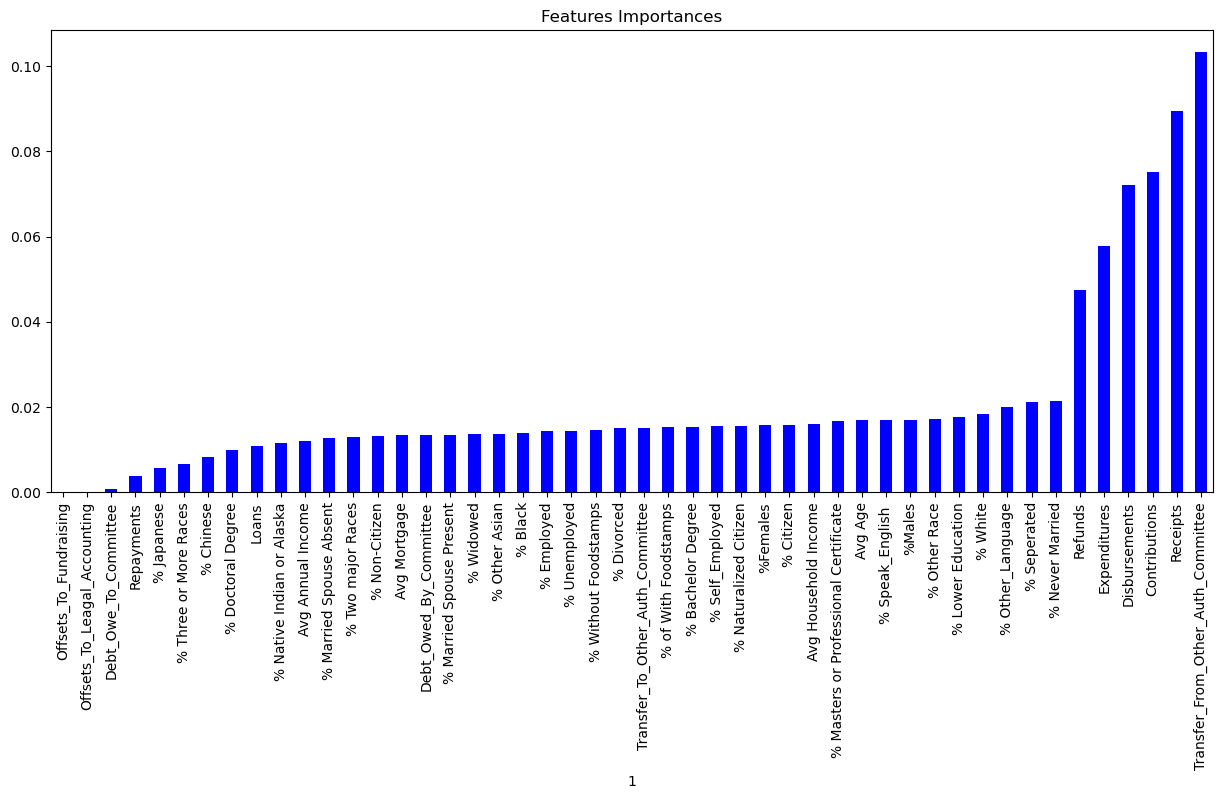

In [316]:
# Visualizing the features by their importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='bar', color='blue', title= 'Features Importances', legend=False , figsize=(15, 6))

#### 3-Creating a Logistic Regression Model with the Original Data
---

**Splitting our data**

---

In [323]:
# Split our preprocessed data into our features and target arrays
y = campaign_df['Winner'].values
X = campaign_df.drop('Winner' , axis = 1)


# Split the preprocessed data into a training and testing dataset
X_train , X_test , y_train , y_test = train_test_split(X , y  , random_state = 2)

**Creating Fitting and validating a logistic regression model**

---

In [326]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver = 'lbfgs' , max_iter = 200 , random_state = 1)

# Fit the model using training data
classifier.fit(X_train , y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

**Making predictions on the testing data labels by using the testing data (`X_test`) and the fitted model.**

---
- Generating the accuracy score
- Generating a confusion matrix.
- Printing the classification report.

In [329]:
# Evaluate model using accuracy_score()
from sklearn.metrics import accuracy_score
predictions = classifier.predict(X_test)

#Printing the accuracy test result
print(f" Logistic Regression Model Accuracy: {accuracy_score(y_test , predictions):.3f}")

 Logistic Regression Model Accuracy: 0.947


---

In [332]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[821,  10],
       [ 36,   3]])

In [334]:
# Print the classification report for the model
from sklearn.metrics import classification_report
target_names = ["winner1", "winner0"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     winner1       0.96      0.99      0.97       831
     winner0       0.23      0.08      0.12        39

    accuracy                           0.95       870
   macro avg       0.59      0.53      0.54       870
weighted avg       0.93      0.95      0.93       870



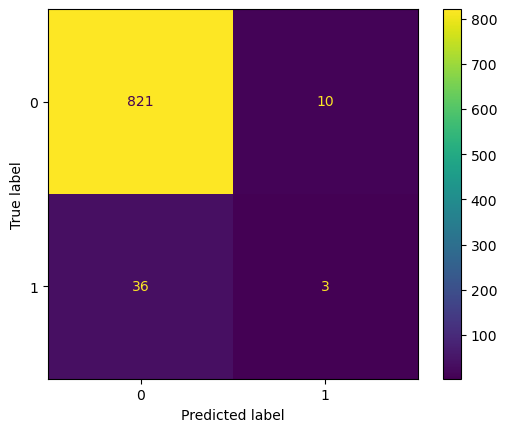

In [336]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generating a confusion matrix display from predictions
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, predictions)


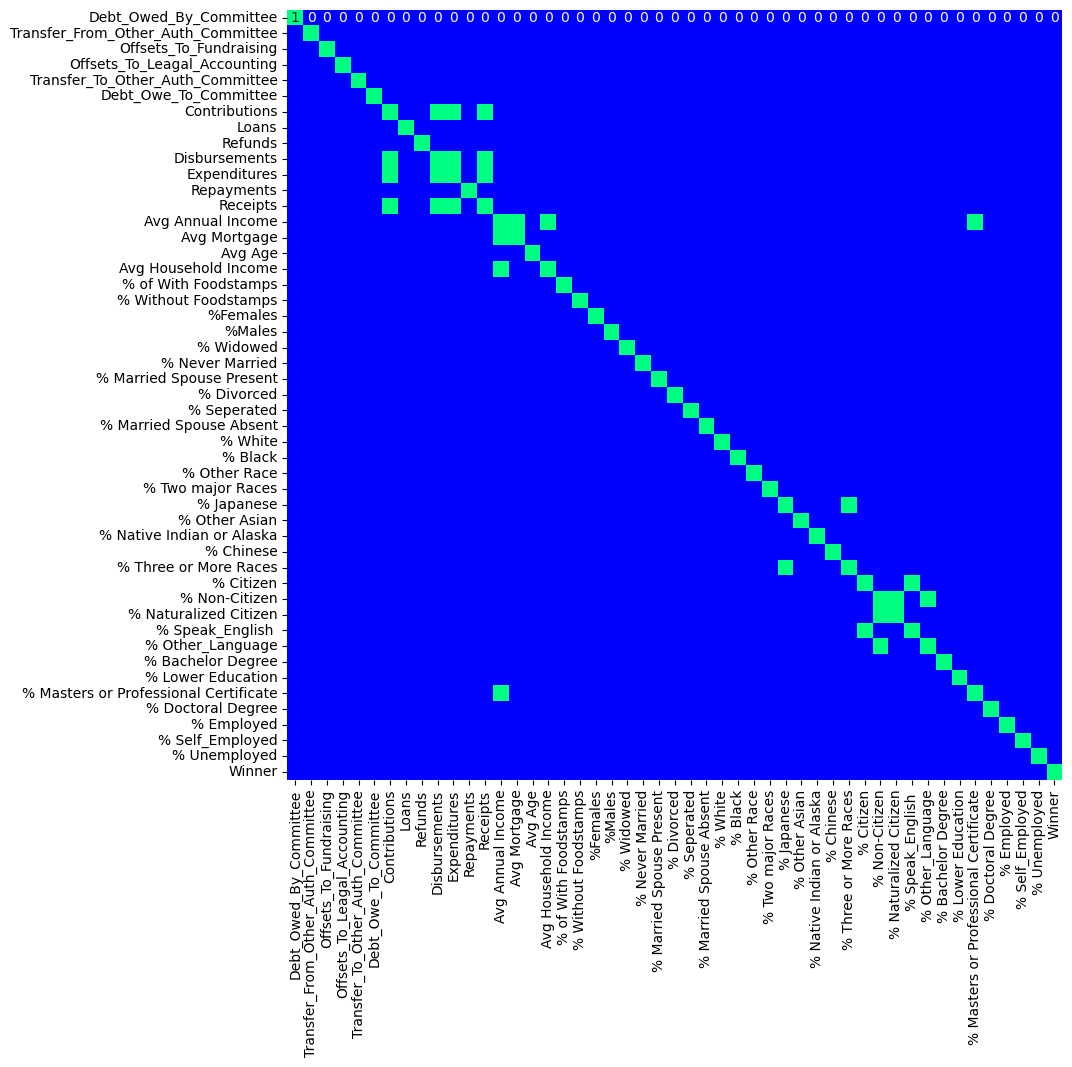

In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is a list, convert it to a DataFrame
df = campaign_df

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False , cmap='winter')
plt.show()

---

#### 4-Creating a Neural Network Model
---

**Initializing a StandardScaler instance**

In [343]:
# Creating a StandardScaler instances
scaler = StandardScaler()

# Fitting/training the model
X_scaler = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---
**Compiling, Training and Evaluateing the Model**

In [346]:
# Scratch pad
X_train_scaled.shape

(2609, 48)

In [348]:
#Scratch pad
len(X_train_scaled)

2609

In [350]:
# Defining the model - deep neural
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5


psychic = tf.keras.models.Sequential()

# First hidden layer
psychic.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, activation="relu", input_dim =48))

# Second hidden layer
psychic.add(tf.keras.layers.Dense(units = hidden_nodes_layer2 , activation = "sigmoid" ))

# Output layer
psychic.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
psychic.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 443 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

In [352]:
# Compiling the model
psychic.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [354]:
# Training the model
fit_model = psychic.fit(X_train_scaled , y_train , epochs = 100)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.1644 - loss: 0.8391 
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.8836 - loss: 0.5548
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.9476 - loss: 0.4083
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.9528 - loss: 0.3387
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.9547 - loss: 0.2966
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.9535 - loss: 0.2719
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.9530 - loss: 0.2530
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.9508 - loss: 0.2432
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - accuracy: 0.9530 - loss: 0.2256
Epoch 10/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.9509 - loss: 0.2217
Epoch 11/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.9446 - loss: 0.2238
Epoch 12/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 

In [356]:
# Evaluate the model using the test data
model_loss, model_accuracy = psychic.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

28/28 - 0s - 2ms/step - accuracy: 0.9448 - loss: 0.1211
Loss: 0.1210557222366333, Accuracy: 0.9448275566101074


In [358]:
# Exporting our model to HDF5 file
psychic.save("Project4.h5")

---
**Step 3: Optimize the model with the `keras_tuner`**

In [215]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    psychic_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    psychic_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=len(campaign_df)))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        psychic_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    psychic_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    psychic_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return psychic_model

In [217]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [219]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))


Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
sigmoid           |sigmoid           |activation
7                 |7                 |first_units
2                 |2                 |num_layers
3                 |3                 |units_0
3                 |3                 |units_1
1                 |1                 |units_2
3                 |3                 |units_3
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/input_spec.py", line 227, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 3479, but received input with shape (None, 48)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 48), dtype=float32)
  • training=True
  • mask=None


In [377]:
 # Get best model hyperparameters
hyper_psychic = tuner.get_best_hyperparameters(1)[0]
hyper_psychic.values

{'activation': 'tanh',
 'first_units': 5,
 'num_layers': 4,
 'units_0': 1,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0,
 'units_1': 1,
 'units_2': 1,
 'units_3': 1}

In [221]:
best_psychic = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_psychic.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './untitled_project/trial_0002/checkpoint.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [99]:
# Export our model to HDF5 file
best_psychic.save("Project4.h5")

NameError: name 'best_psychic' is not defined

#### Fetching the FEC database